## Titanic Dataset

- well established in the community
- categorical and numerical attributes
- missing categorical and numerical values
- binary classification target

### Sources

- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8#:~:text=The%20recall%20tells%20us%20that,the%20people%20who%20actually%20survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [4, 3]

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.shape

(891, 15)

In [5]:
# sibsp = number of siblings + spouses
# parch = number of parents + children

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


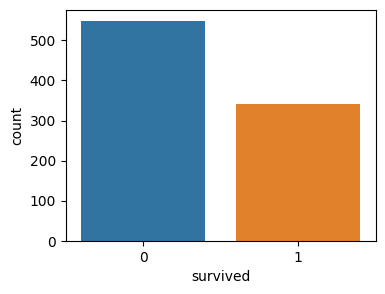

In [7]:
sns.countplot(df, x='survived');

### Handle Redundant Attributes

- Drop attributes that are highly corrolated

In [8]:
df2 = df.copy()

df2.drop(['alive'], axis=1, inplace=True)
df2.drop(['embarked'], axis=1, inplace=True)
df2.drop(['class'], axis=1, inplace=True)
df2.drop(['adult_male'], axis=1, inplace=True)
df2.drop(['who'], axis=1, inplace=True)

df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,True


### Handle Missing Values

- `age`
    - Estimate values assuming normal distribution

- `deck`
    - Too many missing values, drop attribute

- `embark_town`
    - Impute most common value

In [9]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
alone            0
dtype: int64

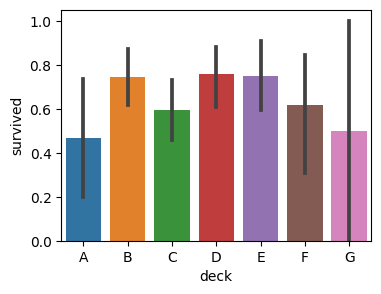

In [10]:
sns.barplot(x='deck', y='survived', data=df);

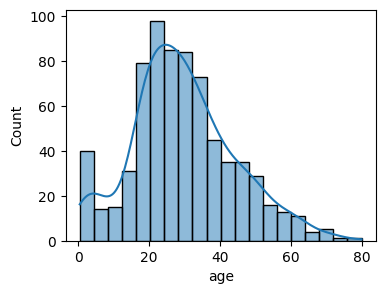

In [11]:
sns.histplot(df2, x="age", kde=True);

In [12]:
from sklearn.impute import SimpleImputer

df3 = df2.copy()

df3.drop(['deck'], axis=1, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')
df3['embark_town'] = imputer.fit_transform(df3[['embark_town']])

np.random.seed(123)
age_mean = df3["age"].mean()
age_std = df3["age"].std()
age_missing = df3["age"].isna()
age_count = age_missing.sum()
age_samples = np.random.normal(loc=age_mean, scale=age_std, size=age_count)
df3.loc[age_missing, "age"] = age_samples

df3.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

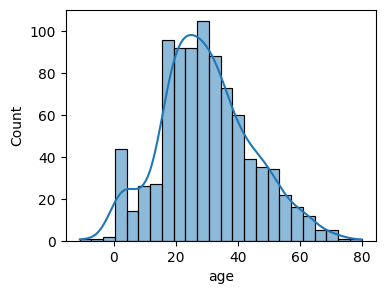

In [13]:
sns.histplot(df3, x="age", kde=True);

In [14]:
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True


### Converting Features

In [15]:
categorical_cols = [
    'sex',
    'embark_town',
    'alone'
]

df4 = df3.copy()

df4 = pd.get_dummies(df4, columns=categorical_cols)

In [16]:
df4.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [18]:
X = df4.drop(['survived'], axis=1)
y = df4['survived']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [19]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

61.66

In [20]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.49

In [32]:
decision_tree = DecisionTreeClassifier(max_depth=15)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

96.63

In [38]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data, format="svg")
graph.render("decision_tree")

'decision_tree.svg'